# Seleção dos dados com base do arquivo selected_crimes.csv


In [2]:
#Bibliotecas necesárias para a seleção
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,4)
print('Bibliotecas prontas')

Bibliotecas prontas


In [ ]:
df_general = pd.read_csv('../data/00_dados_brutos.csv')
df_general.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,...,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,turno,periodo,consolidado_stratified
0,Nao informado,Nao informado,SEX,JUNHO,2021,2021-06-04,AMEACA,Nao informado,ÓDIO OU VINGANÇA,OUTROS MEIOS,...,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,<P>A&NBSP;COMUNICANTE ACIMA QUALIFICADA&NBSP;C...,Nao informado,TARDE,1 SEMESTRE DE 2021,AMEACA
1,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,DOM,JUNHO,2020,2020-06-21,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,...,ADULTO II (25 A 29 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,NAO INFORMADO,<p>//A comunicante acima qualificada comparece...,Nao informado,TARDE,1 SEMESTRE DE 2020,AMEACA
2,Nao informado,Nao informado,QUA,MAIO,2023,2023-05-10,ESTUPRO DE VULNERAVEL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,...,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,PADRASTO,"<P>A RELATORA ATUALMENTE COM 21 ANOS DE IDADE,...",M,TARDE,1 SEMESTRE DE 2023,ESTUPRO DE VULNERAVEL
3,Nao informado,Nao informado,SEG,JANEIRO,2022,2022-01-10,VIOLENCIA PSICOLOGICA,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,...,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,PAI,"<P>RELATA QUE HA APROXIMADAMENTE DOIS MESES, A...",M,TARDE,1 SEMESTRE DE 2022,VIOLENCIA PSICOLOGICA
4,Nao informado,Nao informado,SAB,AGOSTO,2023,2023-08-12,AMEACA,Nao informado,OUTRAS,SEM INSTRUMENTO,...,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,NAO INFORMADO,"<P><FONT SIZE=""3"">A IDOSA 78 ANOS, E DEFICIENT...",Nao informado,MANHA,2 SEMESTRE DE 2023,AMEACA


In [4]:
#Análise do dataset
df_general.info()
df_general.value_counts('consolidado_stratified')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   unidade_origem          500 non-null    object
 1   unidade_responsavel     500 non-null    object
 2   dia_semana              500 non-null    object
 3   mes_fato                500 non-null    object
 4   ano_fato                500 non-null    int64 
 5   data_fato               500 non-null    object
 6   consolidado             500 non-null    object
 7   especificacao_crime     500 non-null    object
 8   causa_presumivel        500 non-null    object
 9   meio_empregado_sisp     500 non-null    object
 10  bairros                 500 non-null    object
 11  local_ocorrencia        500 non-null    object
 12  vit_fx_etaria           500 non-null    object
 13  vit_sexo                500 non-null    object
 14  vit_cor_pele            500 non-null    object
 15  vit_gr

consolidado_stratified
AMEACA                   291
LESAO CORPORAL           161
ESTUPRO DE VULNERAVEL     21
IMPORTUNACAO SEXUAL       15
VIOLENCIA PSICOLOGICA     12
Name: count, dtype: int64

In [5]:
#seleção dos dados

data = {'Classificação': df_general['consolidado_stratified'],
        'Relato': df_general['relato']}

df_crimes = pd.DataFrame(data)
df_crimes.head()

,Classificação,Relato
0,AMEACA,<P>A&NBSP;COMUNICANTE ACIMA QUALIFICADA&NBSP;C...
1,AMEACA,<p>//A comunicante acima qualificada comparece...
2,ESTUPRO DE VULNERAVEL,"<P>A RELATORA ATUALMENTE COM 21 ANOS DE IDADE,..."
3,VIOLENCIA PSICOLOGICA,"<P>RELATA QUE HA APROXIMADAMENTE DOIS MESES, A..."
4,AMEACA,"<P><FONT SIZE=""3"">A IDOSA 78 ANOS, E DEFICIENT..."


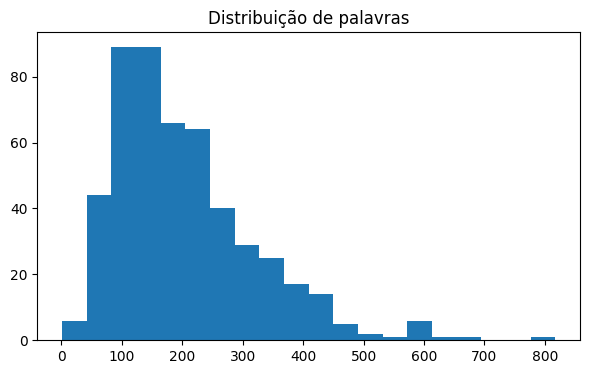

In [6]:
df_crimes['Quantidade de chracteres'] = df_crimes['Relato'].apply(len)
df_crimes['Quantidade de palavras'] = df_crimes['Relato'].apply(lambda x: len(x.split()))

plt.hist(df_crimes['Quantidade de palavras'], bins=20)
plt.title('Distribuição de palavras')
plt.show()

In [ ]:
#Transformando esse database em csv
df_crimes.to_csv('01_dados_selecionados.csv', index = False)